In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import nibabel as nib


In [8]:
data_path = "R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\MSD/Task01_BrainTumour/imagesTr/"
data_path2 = "R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\MSD\Task01_BrainTumour\labelsTr/"
modality = {0: "FLAIR", 1: "T1w", 2: "t1gd",3: "T2w"}
label_class = {1: "edema", 2: "non-enhancing tumor", 3: "enhancing tumour"}

In [26]:
ds_root = sorted([ds for ds in glob.glob(root_path+"/*") if ds not in glob.glob(root_path+"/*.*")])
ds_root


['r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\ACDC',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Brain-TR-GammaKnife-processed',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Brain_Tumor_Dataset_Figshare(done)',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\CC-Tumor-Heterogeneity',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\CHAOS_Train_Sets',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\ISLES-2022',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\MSD',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Meningioma-SEG-CLASS',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\NCI-ISBI',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\PROMISE',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Picai',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\QIN-PROSTATE-Repeatability',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\QUBIQ',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Spine',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\amos22']

In [30]:
def contain(ds_root, ds_name):
    for name in ds_name:
        if name in ds_root:
            return True
    return False
[ds for ds in ds_root if contain(ds, dataset_lib.keys())]

['r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\Brain_Tumor_Dataset_Figshare(done)',
 'r:\\KNEEAI2023-A11834\\Datasets\\MedSamDataSet\\MSD']

In [32]:
os.path.basename(ds_root[0])

'ACDC'

In [57]:
import os
import glob
import ds_lib as dl
from processing_utile import include
ds_root = [ds for ds in glob.glob(dl.DATASETS_PATH + "/*") if ds not in 
                                            glob.glob(dl.DATASETS_PATH+"/*.*")]

ds_root_process = [ds for ds in ds_root if include(ds, dl.dataset_lib.keys())]

In [58]:
print(ds_root_process)

['R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\Brain_Tumor_Dataset_Figshare', 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD']


In [109]:
import json
DATASETS_PATH = "R:/KNEEAI2023-A11834\Datasets/SAMRIDataSet/amos22/amos22"
def process_MSD(root_path):
    with open(glob.glob(root_path+"/*.json")[0]) as json_data:
        js_data = json.load(json_data)
        json_data.close()
    print(js_data.keys())
    print(js_data["training"][0])
    
process_MSD(DATASETS_PATH)

dict_keys(['name', 'description', 'author', 'reference', 'licence', 'release', 'contact', 'tensorImageSize', 'modality', 'labels', 'numTraining', 'numValidation', 'numTest', 'training', 'validation', 'test'])
{'image': './imagesTr/amos_0001.nii.gz', 'label': './labelsTr/amos_0001.nii.gz'}


In [121]:
data = nib.load("R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\\amos22/amos22/imagesTr/amos_0001.nii.gz").get_fdata()
data.shape

(768, 768, 90)

In [105]:
data.shape

(320, 320, 130)

In [120]:
l_data = nib.load("R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\\MSD/Task10_Colon//imagesTr/colon_219.nii.gz").get_fdata()
l_data.shape

(512, 512, 137)

In [92]:
len(data.shape)

3

In [28]:
dataset_lib = {
    "Brain_Tumor_Dataset_Figshare": {
        "img_path" : "/data/",
        "gt_path": "/data/",
        "save_path": "/processed_data/",
        "save_img_path" : "/processed_img/",
        "label_class" : {1:"meningioma", 2:"glioma", 3:"pituitary"}
    },

    "MSD" : {

    }
}
dataset_lib.keys()

dict_keys(['Brain_Tumor_Dataset_Figshare', 'MSD'])

In [84]:
data_name = sorted(glob.glob(data_path + "*"))
gt_name = sorted(glob.glob(data_path2 + "*"))

In [85]:
len(data_name)

484

In [86]:
data_name[:5]

['R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD/Task01_BrainTumour/imagesTr\\BRATS_001.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD/Task01_BrainTumour/imagesTr\\BRATS_002.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD/Task01_BrainTumour/imagesTr\\BRATS_003.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD/Task01_BrainTumour/imagesTr\\BRATS_004.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD/Task01_BrainTumour/imagesTr\\BRATS_005.nii.gz']

In [87]:
gt_name[:5]

['R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD\\Task01_BrainTumour\\labelsTr\\BRATS_001.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD\\Task01_BrainTumour\\labelsTr\\BRATS_002.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD\\Task01_BrainTumour\\labelsTr\\BRATS_003.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD\\Task01_BrainTumour\\labelsTr\\BRATS_004.nii.gz',
 'R:\\KNEEAI2023-A11834\\Datasets\\SAMRIDataSet\\MSD\\Task01_BrainTumour\\labelsTr\\BRATS_005.nii.gz']

In [88]:
image = nib.load(data_name[0]).get_fdata()
gt = nib.load(gt_name[0]).get_fdata()

In [54]:
folder_paths = glob.glob("R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\MSD/*")
folder_names = [os.path.basename(path) for path in folder_paths]
folder_names

['Task01_BrainTumour',
 'Task02_Heart',
 'Task03_Liver',
 'Task04_Hippocampus',
 'Task05_Prostate',
 'Task06_Lung',
 'Task07_Pancreas',
 'Task08_HepaticVessel',
 'Task09_Spleen',
 'Task10_Colon']

In [89]:
print("image shape: ",image.shape)
print("ground truth shape: ",gt.shape)

image shape:  (240, 240, 155, 4)
ground truth shape:  (240, 240, 155)


In [34]:
for i in range(27,35):
    print(np.sum(gt[:,:,i]))

0.0
0.0
3.0
5.0
28.0
342.0
580.0
807.0


In [8]:
type(image)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2044.0].


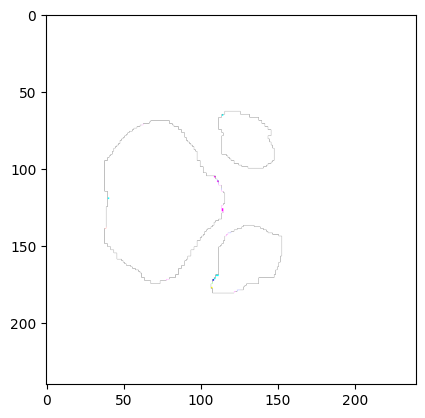

In [90]:
plt.imshow(image[:,:,35], cmap="gray")
plt.show()

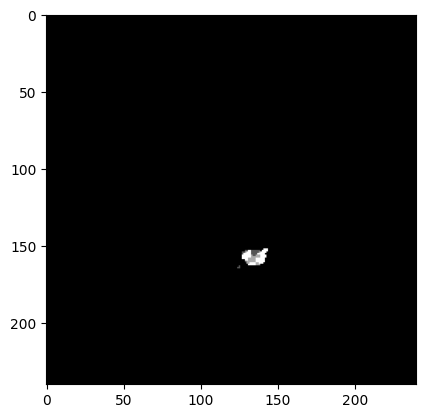

In [51]:
plt.imshow(gt[:,:,32], cmap="gray")
plt.show()

In [50]:
np.unique(gt[:,:,32])

array([0., 1., 2., 3.])

In [14]:
label = np.array(label)
label

array([[1.]])

In [15]:
str(int(label.item()))

'1'

In [16]:
tumorborder = np.array(tutorborder)

In [17]:
tumorborder

array([[267.61524501, 231.37568058, 277.83666062, 248.10163339,
        289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
        318.72232305, 249.9600726 , 321.50998185, 237.88021779,
        354.96188748, 234.16333938, 367.97096189, 227.65880218,
        380.9800363 , 210.93284936, 372.61705989, 195.13611615,
        363.32486388, 177.48094374, 350.31578947, 176.55172414,
        336.37749546, 183.98548094, 317.79310345, 196.06533575,
        305.71324864, 207.21597096, 295.49183303, 217.43738657,
        288.98729583, 222.08348457, 273.19056261, 223.94192377,
        268.54446461, 228.58802178]])

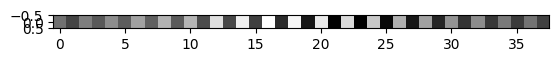

In [18]:
plt.imshow(tumorborder, cmap="gray")
plt.show()

In [21]:
mask = np.array(tutormask)

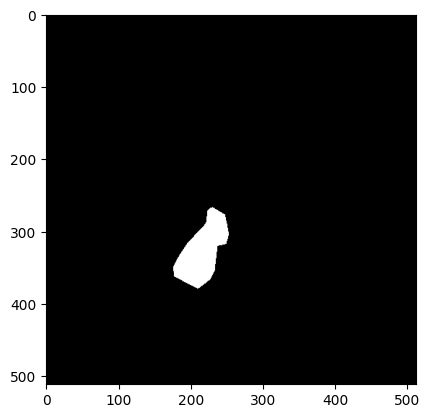

In [26]:
plt.imshow(mask, cmap="gray")
plt.show()

In [65]:
data_name[0]

'/scratch/user/s4670484/Brain_Tumor_Dataset_Figshare/data/1.mat'

In [70]:
os.path.basename(data_name[2])[:-4]

'100'

In [79]:
file_name = os.path.basename(data_name[0])[:-4]

In [82]:
image_name = root_path +"/processed_data/"+ file_name + "_" + "label"+str(int(label.item()))

In [75]:
file_path = "R:\KNEEAI2023-A11834\Datasets\SAMRIDataSet\Brain_Tumor_Dataset_Figshare\data/1.mat"

In [76]:
import h5py as h5

In [78]:
data = h5.File(file_path)
data = data['cjdata']

In [79]:
data['image'].shape

(512, 512)

In [81]:
data['tumorMask'].shape

(512, 512)

In [98]:
new_image = np.expand_dims(image,0)

In [100]:
new_image.shape

(1, 512, 512)

In [103]:
img = nib.Nifti1Image(new_iamge, np.eye(4))

In [104]:
nib.save(img, root_path+data_path+"test.nii.gz")

In [105]:
test_img = nib.load(root_path+data_path+"test.nii.gz").get_fdata()

In [107]:
test_img.shape

(1, 512, 512)

In [32]:
image = min_max_norm(image)

In [39]:
comb_img = np.concatenate([image, mask, image+mask], axis=1)

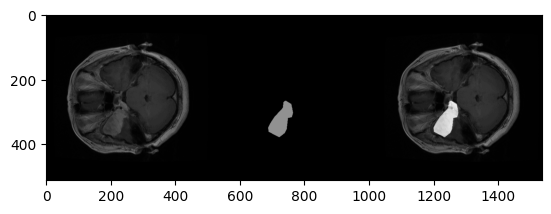

In [40]:
plt.imshow(comb_img, cmap="gray")
plt.show()

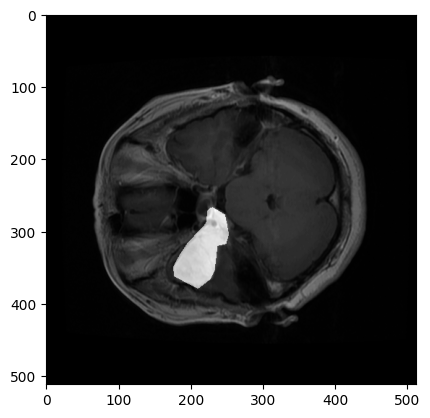

In [38]:
plt.imshow(image + mask, cmap="gray")
plt.show()

In [30]:
np.max(image)

3366

In [31]:
def min_max_norm(image):
    return (image - np.min(image))/(np.max(image)-np.min(image))